In [15]:
import pandas as pnd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
nltk.download('stopwords')
nltk.download('punkt')
# Load the dataset
df = pnd.read_csv('test.csv')
#dropping the missing values
df.dropna(subset=['OriginalTweet'], inplace=True)
# Convert the text corpus into tokens
tokens = []
for tweets in df['OriginalTweet']:
    # Tokenize the tweets
    words = word_tokenize(tweets.lower())
    # Add tokens to the list
    tokens.extend(words)
# Remove URLs
tokens = [re.sub(r'http\S+', '', token) for token in tokens]
# Remove specialized characters
tokens = [re.sub(r'[^\w\s]', '', token) for token in tokens]
# Remove empty strings
tokens = list(filter(None, tokens))
print("Tokens :",tokens)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Tokens : ['trending', 'new', 'yorkers', 'encounter', 'empty', 'supermarket', 'shelves', 'pictured', 'wegmans', 'in', 'brooklyn', 'soldout', 'online', 'grocers', 'foodkick', 'maxdelivery', 'as', 'coronavirusfearing', 'shoppers', 'stock', 'up', 'tcogr76pcrlwh', 'tcoivmkmsqdt1', 'when', 'i', 'could', 'nt', 'find', 'hand', 'sanitizer', 'at', 'fred', 'meyer', 'i', 'turned', 'to', 'amazon', 'but', '11497', 'for', 'a', '2', 'pack', 'of', 'purell', 'check', 'out', 'how', 'coronavirus', 'concerns', 'are', 'driving', 'up', 'prices', 'tcoygbipbflmy', 'find', 'out', 'how', 'you', 'can', 'protect', 'yourself', 'and', 'loved', 'ones', 'from', 'coronavirus', 'panic', 'buying', 'hits', 'newyork', 'city', 'as', 'anxious', 'shoppers', 'stock', 'up', 'on', 'food', 'amp', 'medical', 'supplies', 'after', 'healthcare', 'worker', 'in', 'her', '30s', 'becomes', 'bigapple', '1st', 'confirmed', 'coronavirus', 'patient', 'or', 'a', 'bloomberg', 'staged', 'event', 'tcoiasiregpc4', 'qanon', 'qanon2018', 'qanon2020

In [20]:

# Perform stop word removal

stop_words = set(stopwords.words('english'))
print("stopwords:",stop_words)
clean_tokens = [word for word in tokens if word not in stop_words]
print('filtered_tokens :',clean_tokens)
# Count word frequencies
word_freq = Counter(clean_tokens)
# Create a list of word frequencies
word_freq_list = []
for word, freq in word_freq.items():
    word_freq_list.append((word, freq))
print(word_freq_list)




stopwords: {'how', 'have', 'some', 'than', 'which', 'has', 'be', 'me', "hadn't", 'd', 've', 'haven', 'then', 'they', "she's", 'shan', 'most', 'wasn', 'so', 'to', "weren't", 'on', 'myself', "won't", 'him', "wasn't", 'under', 'up', 'ours', 'same', 'other', 'off', 'few', 'had', 'm', 'all', 'its', 'my', 'for', 'about', 'i', 's', "don't", 'if', 'this', 'our', 'couldn', 'their', 'does', 'against', 'weren', 'am', 'a', 'only', 'hers', 'herself', 'he', "needn't", 'very', 'any', "mightn't", 'himself', 'hadn', "isn't", 'these', "shouldn't", 'was', 'into', 'out', "doesn't", 'as', 'itself', 'or', 'too', 'o', 'no', 'your', 'where', 'ma', 'own', "should've", 'more', 'aren', 'doesn', 'further', 'but', 'after', 'below', 'her', "mustn't", 'won', 'is', 'an', 'of', "wouldn't", 'what', 'being', 'did', "it's", 'll', 'from', 'doing', "you're", 'his', 'over', 'were', 'here', 'at', 'through', "shan't", 'having', 'while', 'you', 'down', 'between', 'now', 'y', "didn't", 'during', 're', "aren't", 'wouldn', 'those

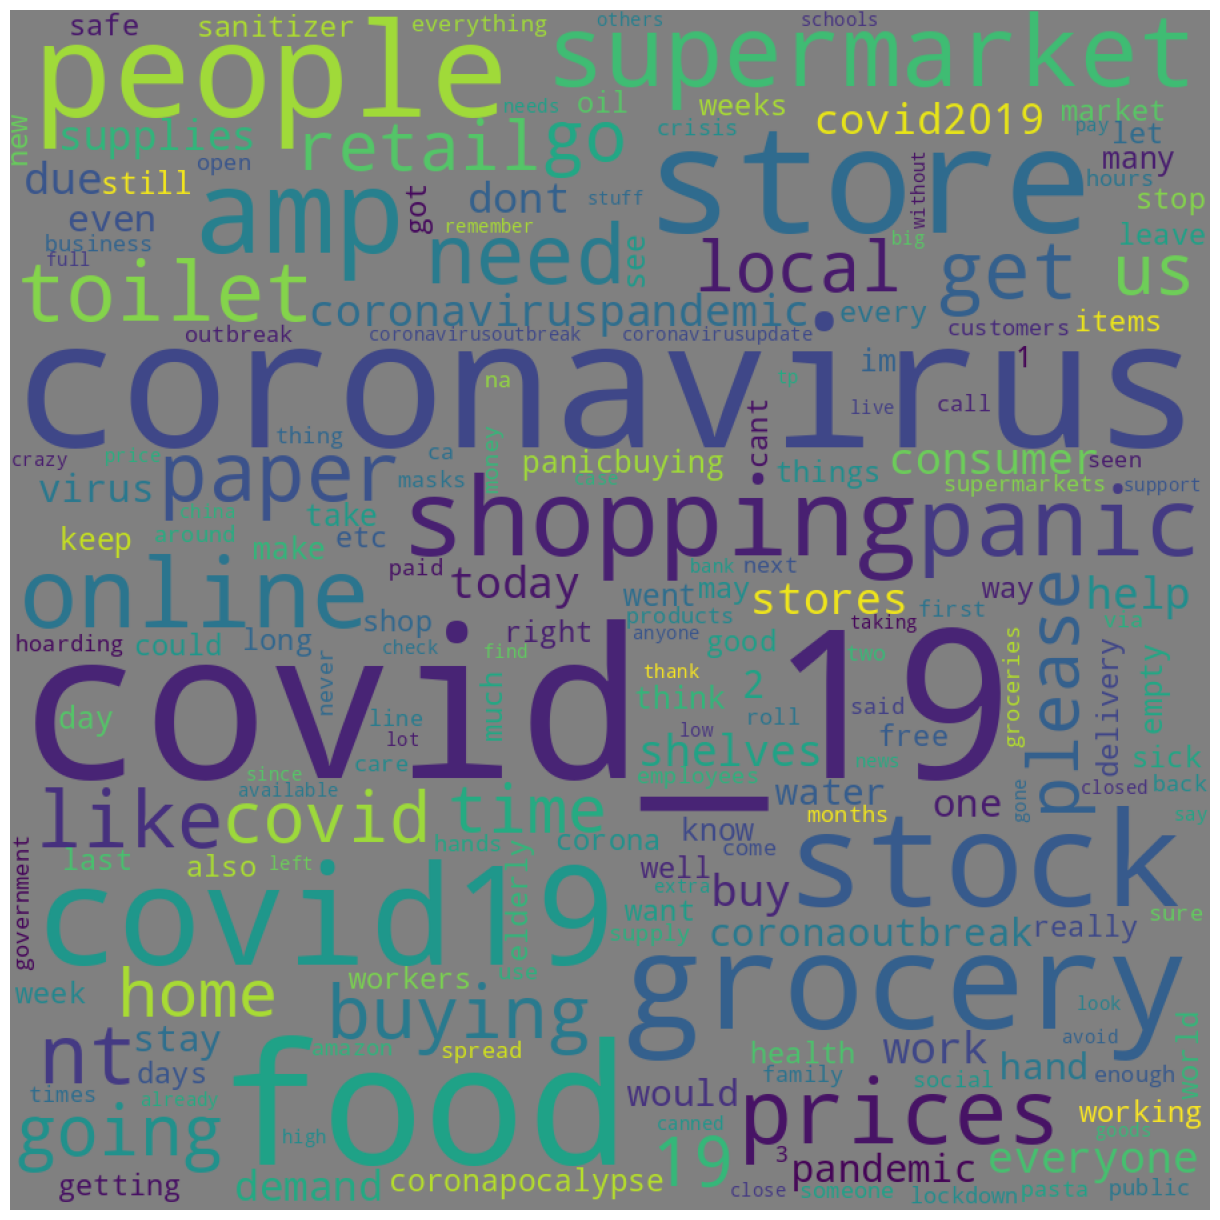

In [21]:
# Create a word cloud
wordimage = WordCloud(width = 900, height = 900, background_color ='grey',stopwords=stop_words,
                 min_font_size = 12).generate_from_frequencies(word_freq)

# Show the word cloud
plt.figure(figsize = (12, 12), facecolor = None)
plt.imshow(wordimage)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()
